In [1]:
# magic to make plots appear inline
%matplotlib inline

# load Providentia interactive class
from providentia import Interactive

In [2]:
# read and filter data from .conf
inst = Interactive(conf='test_interactive.conf', subsection='STANDARD·Spain')

Reading data
SELECTED SPECIES
- Main network-species ['EBAS|sconcno2', 'EBAS|sconco3']
Resetting filter
Filtering data


In [3]:
# print .conf
inst.print_config()

[STANDARD]
network = EBAS
species = sconcno2, sconco3
resolution = hourly
start_date = 20180101
end_date = 20190101
#experiments = cams61_emep_ph2-eu-000 (EMEP)
experiments = cams61_emep_ph2-eu-000, cams61_monarch_ph2-eu-000 (EMEP, MONARCH)
#experiments = cams61_emep_ph2-eu-000, cams61_monarch_ph2-eu-000, cams61_silam_ph2-eu-000 (EMEP, MONARCH, SILAM)
observations_data_label = OBS
temporal_colocation = True
spatial_colocation = False
report_type = standard
report_summary = True
report_stations = False
report_title = Providentia Offline Report
report_filename = standard
statistic_mode = Flattened
periodic_statistic_mode = Independent
periodic_statistic_aggregation = Mean
remove_extreme_stations = CAMS

    [[France]]
    country = keep: France ||

    [[Spain]]
    country = keep: Spain ||




In [4]:
# save data to netCDF
inst.save(format='nc')

Data saved to /esarchive/obs/ghost/scripts/Providentia-interactive/saved_data/PRV_20240111_1040.nc


In [5]:
# return data in memory (in Xarray format)
data = inst.get_data(format='xr')
data

<xarray.Dataset>
Dimensions:                                                                         (time: 8760, data_label: 3, ghost_data_variable: 11, station: 13, month: 12)
Coordinates:
  * time                                                                            (time) datetime64[ns] ...
Dimensions without coordinates: data_label, ghost_data_variable, station, month
Data variables: (12/300)
    data_labels                                                                     (data_label) object ...
    ghost_data_variables                                                            (ghost_data_variable) object ...
    EBAS|sconcno2_data                                                              (data_label, station, time) float32 ...
    EBAS|sconcno2_ghost_data                                                        (ghost_data_variable, station, time) float32 ...
    EBAS|sconcno2_GHOST_version                                                     (station, month) object ...
    EBAS|sconcno2_station_reference                                                 (station, month) object ...
    ...                                                                              ...
    EBAS|sconco3_principal_investigator_name                                        (station, month) object ...
    EBAS|sconco3_principal_investigator_institution                                 (station, month) object ...
    EBAS|sconco3_principal_investigator_email_address                               (station, month) object ...
    EBAS|sconco3_contact_name                                                       (station, month) object ...
    EBAS|sconco3_contact_institution                                                (station, month) object ...
    EBAS|sconco3_contact_email_address                                              (station, month) object ...
Attributes:
    title:         Saved data from Providentia interactive.
    institution:   Barcelona Supercomputing Center
    source:        Providentia
    data_version:  1.5

In [6]:
# return specific variable in memory
latitude_var = inst.get_var('EBAS|sconcno2_data')
latitude_var

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]]],
  mask=[[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True,

In [7]:
# calculate and return statistics
stat = inst.calculate_stat('r', labela='OBS', labelb='EMEP', per_station=True)
stat

array([], dtype=float32)

In [8]:
# reset filter
#inst.reset_filter()

In [9]:
# filter data for a station
#inst.select_station('AT0002R_UVP')
#station_data = inst.get_data(format='xr')
#station_data

In [10]:
# reset filter
#inst.reset_filter()

In [11]:
# filter data for multiple stations
#inst.select_station(['AT0002R_UVP','SK0007R_UVP'])
#stations_data = inst.get_data(format='xr')
#stations_data

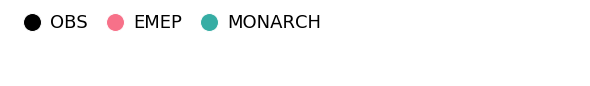

In [12]:
# make a legend plot
inst.make_plot('legend')

AttributeError: 'dict' object has no attribute 'shape'

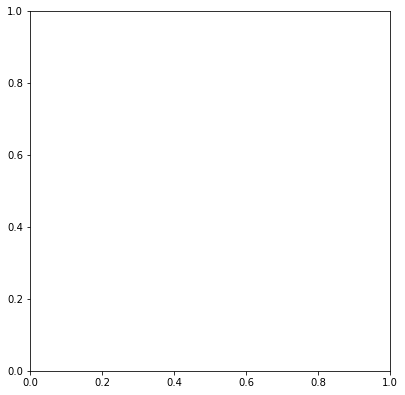

In [13]:
# make a metadata plot
inst.make_plot('metadata')

In [ ]:
# make a map plot (p95 statistic of Obs.)
inst.make_plot('map-p95', labela='EMEP', map_extent=[-180, 180, -90, 90])

In [ ]:
# make a map plot (r2 statistic)
inst.make_plot('map-r2', labela='OBS', labelb='EMEP', map_extent=[-180, 180, -90, 90])

In [ ]:
# make a timeseries plot
inst.make_plot('timeseries', annotate=True, smooth=100, hidedata=True)

In [ ]:
# make a periodic plot (p95 bias statistic)
inst.make_plot('periodic-p95', plot_options=['annotate'])

In [ ]:
# make a periodic plot (r statistic)
inst.make_plot('periodic-r', plot_options=['annotate'])

In [ ]:
# make a periodic-violin plot
inst.make_plot('periodic-violin', plot_options=['annotate'], data_labels=['SILAM'])

In [ ]:
# make a distribution plot
inst.make_plot('distribution', annotate=['p5','p95'])

In [ ]:
# make a scatter plot
inst.make_plot('scatter', plot_options=['annotate','regression'])

In [ ]:
# make a boxplot
inst.make_plot('boxplot', plot_options=['annotate'])

In [ ]:
# make a heatmap (Median stat)
inst.make_plot('heatmap-Median', annotate=True, multispecies=True)

In [ ]:
# make a table (p25 stat)
inst.make_plot('table-p25', multispecies=True)

In [ ]:
# make a statsummary plot
inst.make_plot('statsummary')